In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import math

In [19]:
def calc_patches(df, num_patches=3):
    df_new = df.copy()
    df_new = df_new.groupby('start_patch').mean().reset_index()
    threshold = max(df_new['start_patch'])/num_patches
    df_new['patch'] = [math.floor(start/threshold) for start in df_new['start_patch']]
    return df_new

In [20]:
PATCH_SIZE = 3
df_vocals_morning = pd.read_csv('../data/hume/processed/Cuban_vocals_morning.csv', index_col=0)
df_vocals_morning_patch = calc_patches(df_vocals_morning,PATCH_SIZE)

df_vocals_afternoon = pd.read_csv('../data/hume/processed/Cuban_vocals_afternoon.csv', index_col=0)
df_vocals_afternoon_patch = calc_patches(df_vocals_afternoon,PATCH_SIZE)

# df_vocals = pd.concat([df_vocals_morning, df_vocals_afternoon])

df_band_morning = pd.read_csv('../data/hume/processed/Funk_band_morning.csv', index_col=0)
df_band_morning_patch = calc_patches(df_band_morning,PATCH_SIZE)


df_band_afternoon = pd.read_csv('../data/hume/processed/Funk_band_afternoon.csv', index_col=0)
df_band_afternoon_patch = calc_patches(df_band_afternoon,PATCH_SIZE)


df_rhythm_morning = pd.read_csv('../data/hume/processed/Funk_rhythm_morning.csv', index_col=0)
df_rhythm_morning_patch = calc_patches(df_rhythm_morning,PATCH_SIZE)

df_rhythm_afternoon = pd.read_csv('../data/hume/processed/Funk_rhythm_afternoon.csv', index_col=0)
df_rhythm_afternoon_patch = calc_patches(df_rhythm_afternoon,PATCH_SIZE)


df_merged = pd.concat([pd.concat([df_vocals_morning, df_vocals_afternoon, df_band_morning,df_band_afternoon, df_rhythm_morning, df_rhythm_afternoon])])
df_merged_patch = pd.concat([pd.concat([df_vocals_morning_patch, df_vocals_afternoon_patch, df_band_morning_patch,df_band_afternoon_patch, df_rhythm_morning_patch, df_rhythm_afternoon_patch])])
df_merged

,anger,disgust,fear,joy,sadness,surprise,neutral,start_patch,start
0,0.039957,0.114220,0.126544,0.169541,0.137182,0.147788,0.157061,0.0,0.10
1,0.037922,0.104910,0.110700,0.190294,0.127883,0.129474,0.150551,0.0,0.20
2,0.044073,0.118693,0.129124,0.167583,0.158697,0.130753,0.167633,0.0,0.30
3,0.041380,0.134487,0.140038,0.133327,0.198558,0.126955,0.179034,0.0,0.40
4,0.047777,0.118812,0.136461,0.141578,0.157510,0.128101,0.191475,0.0,0.50
...,...,...,...,...,...,...,...,...,...
63475,0.074321,0.149759,0.149410,0.091297,0.201079,0.097925,0.242697,140.0,8588.08
63476,0.067359,0.155635,0.145315,0.077353,0.226719,0.081795,0.271931,140.0,8588.20
63477,0.071918,0.149919,0.149765,0.091086,0.218187,0.088475,0.270641,140.0,8588.32
63478,0.063536,0.148344,0.139564,0.079959,0.225815,0.088789,0.313732,140.0,8588.40


# H1: Do we measure more flow state?

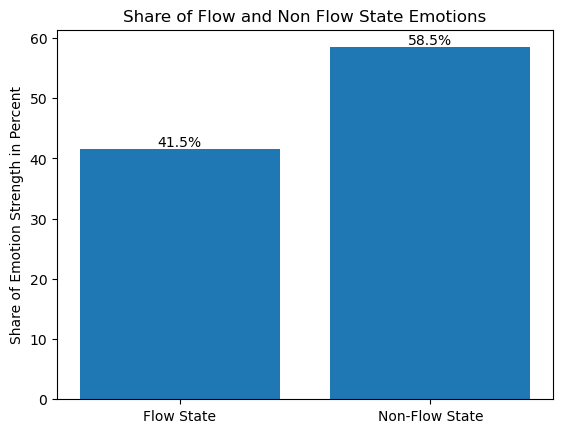

In [21]:
import matplotlib.pyplot as plt

flow_emotions = ['joy', 'fear', 'surprise']
non_flow_emotions = ['neutral', 'sadness', 'anger']

df_merged['flow'] = df_merged[flow_emotions].sum(axis=1)
df_merged['non_flow'] = df_merged[non_flow_emotions].sum(axis=1)
total_emotions_measured = df_merged['flow'].sum() + df_merged['non_flow'].sum()

plt.bar(['Flow State', 'Non-Flow State'], [(df_merged['flow'].sum()/total_emotions_measured)*100, (df_merged['non_flow'].sum()/total_emotions_measured)*100])
plt.title('Share of Flow and Non Flow State Emotions')

# Add percentage labels above the bars
flow_percentage = (df_merged['flow'].sum()/total_emotions_measured)*100
non_flow_percentage = (df_merged['non_flow'].sum()/total_emotions_measured)*100
plt.text(0, flow_percentage, f'{flow_percentage:.1f}%', ha='center', va='bottom')
plt.text(1, non_flow_percentage, f'{non_flow_percentage:.1f}%', ha='center', va='bottom')
plt.ylabel('Share of Emotion Strength in Percent')

# Show the plot
plt.show()

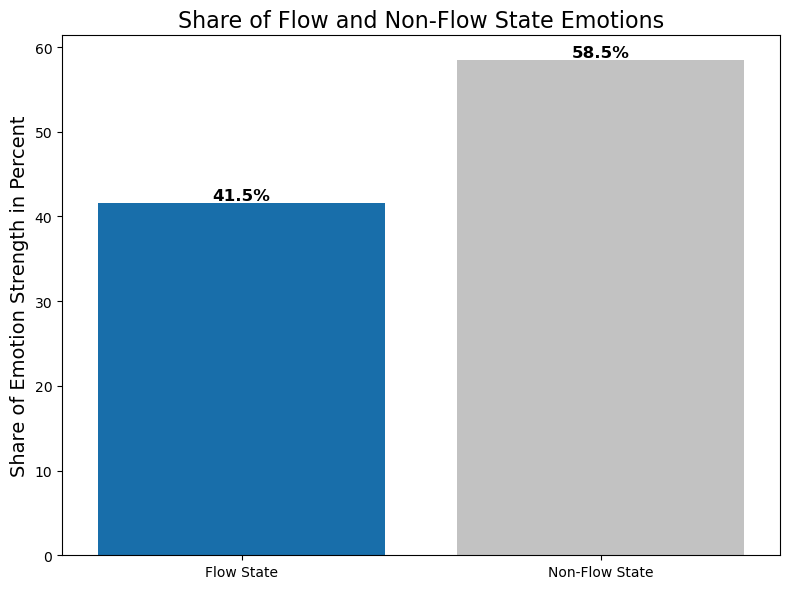

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

mckinsey_colors = ['#0073C2', '#C2C2C2']

flow_emotions = ['joy', 'fear', 'surprise']
non_flow_emotions = ['neutral', 'sadness', 'anger']

df_merged['flow'] = df_merged[flow_emotions].sum(axis=1)
df_merged['non_flow'] = df_merged[non_flow_emotions].sum(axis=1)
total_emotions_measured = df_merged['flow'].sum() + df_merged['non_flow'].sum()

# Create a figure and axes using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Flow State', 'Non-Flow State'], y=[(df_merged['flow'].sum()/total_emotions_measured)*100, (df_merged['non_flow'].sum()/total_emotions_measured)*100], palette=mckinsey_colors)

# Set the title and axis labels
plt.title('Share of Flow and Non-Flow State Emotions', fontsize=16)
plt.ylabel('Share of Emotion Strength in Percent', fontsize=14)

# Add percentage labels above the bars
flow_percentage = (df_merged['flow'].sum()/total_emotions_measured)*100
non_flow_percentage = (df_merged['non_flow'].sum()/total_emotions_measured)*100
ax.text(0, flow_percentage, f'{flow_percentage:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
ax.text(1, non_flow_percentage, f'{non_flow_percentage:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


In [22]:
from scipy.stats import shapiro

# Check if the differences between the two paired samples are normally distributed
diff = df_merged['flow'] - df_merged['non_flow']
stat, p = shapiro(diff)
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=0.979, p=0.000


/home/bsauter/anaconda3/envs/aaWorkshop/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:
from scipy.stats import wilcoxon

# Perform Wilcoxon signed-rank test
w_statistic, p_value = wilcoxon(df_merged['flow'], df_merged['non_flow'])

formatted_p_value = "{:.2f}".format(p_value)
# Print the W-statistic and p-value
print("W-statistic:", w_statistic)
print("p-value:", formatted_p_value)


W-statistic: 50953489910.0
p-value: 0.00


In [6]:
from scipy.stats import ttest_rel

# Assuming you have two columns 'column1' and 'column2' in your DataFrame

# Perform paired t-test
t_statistic, p_value = ttest_rel(df_merged['flow'], df_merged['non_flow'])

formatted_p_value = "{:.2f}".format(p_value)
# Print the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", formatted_p_value)

t-statistic: -1277.5667387012713
p-value: 0.00


# H2: Measuring flow state more in later sessions

Text(0, 0.5, 'Mean of flow emotions strength')

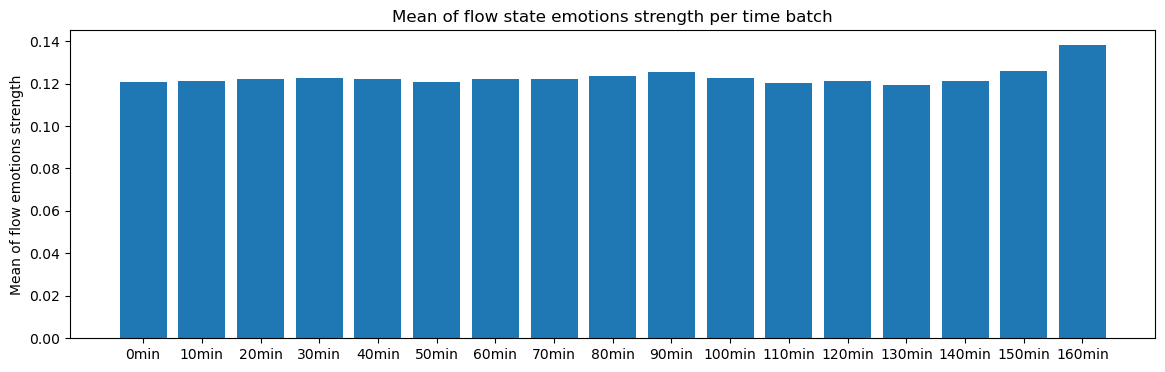

In [7]:
df_merged_cop = df_merged.copy()
flow_emotions = ['joy', 'fear', 'surprise']

df_merged_cop['flow'] = df_merged_cop[flow_emotions].mean(axis=1)
df_merged_cop['start'] = pd.to_datetime(df_merged_cop['start'], unit='s')

# Set the 'start' column as the index
df_merged_cop_reset= df_merged_cop.set_index('start')

# Resample the dataframe to 30-second intervals and calculate the mean of each column
resampled_df_merged_cop = df_merged_cop_reset.resample('10min').mean()

# Reset the index to obtain the 'start' column as a regular column
resampled_df_merged_cop.reset_index(inplace=True)
plt.figure(figsize=(14, 4))
plt.bar([f'{10*val}min' for val in range(0,len(resampled_df_merged_cop))], resampled_df_merged_cop['flow'])
plt.title('Mean of flow state emotions strength per time batch')
plt.ylabel('Mean of flow emotions strength')

In [8]:
def all_emotions_line_plot(df, title):
    plt.figure(figsize=(14, 4))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.plot(df.start, df['joy'], label = "joy")
    plt.plot(df.start, df['fear'], label = "fear")
    plt.plot(df.start, df['neutral'], label = "neutral")
    plt.plot(df.start, df['disgust'], label = "disgust")
    plt.plot(df.start, df['anger'], label = "anger")
    plt.plot(df.start, df['surprise'], label = "surprise")
    plt.plot(df.start, df['sadness'], label = "sadness")
    plt.legend()
    plt.title(title)
    plt.ylabel('Mean Emotion Strength')
    plt.xlabel('Time in hours')
    plt.show()

In [9]:
def flow_non_flow_emotions_line_plot(df, title):
    plt.figure(figsize=(12, 4))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.plot(df.start, df['flow'], label = "flow")
    plt.plot(df.start, df['non_flow'], label = "non_flow")
    plt.legend()
    plt.title(title)
    plt.ylabel('Mean Emotion Strength')
    plt.xlabel('Time in hours')
    plt.show()

In [10]:
def flow_non_flow_per_band_type(df_morning, df_afternoon, title):
    
    flow_emotions = ['joy', 'fear', 'surprise']
    non_flow_emotions = ['neutral', 'sadness', 'anger']

    df_morning['flow'] = df_morning[flow_emotions].mean(axis=1)
    df_morning['non_flow'] = df_morning[non_flow_emotions].mean(axis=1)

    # Convert the 'start' column to datetime format
    df_morning['start'] = pd.to_datetime(df_morning['start'], unit='s')

    # Set the 'start' column as the index
    df_morning_reset= df_morning.set_index('start')

    # Resample the dataframe to 30-second intervals and calculate the mean of each column
    resampled_df_morning = df_morning_reset.resample('60S').mean()

    # Reset the index to obtain the 'start' column as a regular column
    resampled_df_morning.reset_index(inplace=True)

    df_afternoon['flow'] = df_afternoon[flow_emotions].mean(axis=1)
    df_afternoon['non_flow'] = df_afternoon[non_flow_emotions].mean(axis=1)

    # Convert the 'start' column to datetime format
    df_afternoon['start'] = pd.to_datetime(df_afternoon['start'], unit='s')

    # Set the 'start' column as the index
    df_afternoon_reset= df_afternoon.set_index('start')

    # Resample the dataframe to 30-second intervals and calculate the mean of each column
    resampled_df_afternoon = df_afternoon_reset.resample('30S').mean()

    # Reset the index to obtain the 'start' column as a regular column
    resampled_df_afternoon.reset_index(inplace=True)
    
    
    fig, axs = plt.subplots(2, 1, figsize=(12, 7))
    fig.suptitle(title)
    axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
    # Plot line plots on each subplot
    axs[0].plot(resampled_df_morning.start, resampled_df_morning['flow'], label = "flow")
    axs[0].plot(resampled_df_morning.start, resampled_df_morning['non_flow'], label = "non_flow")
    axs[0].set_title('Morning Practice')
    axs[0].set_ylabel('Mean Emotion Stregth')

    # axs[0].set_xlabel('Time in hours')
    axs[1].plot(resampled_df_afternoon.start, resampled_df_afternoon['flow'], label = "flow")
    axs[1].plot(resampled_df_afternoon.start, resampled_df_afternoon['non_flow'], label = "non_flow")
    axs[1].set_title('Afternoon Practice')
    axs[1].set_ylabel('Mean Emotion Stregth')
    axs[1].set_xlabel('Time in hours')


    plt.legend()


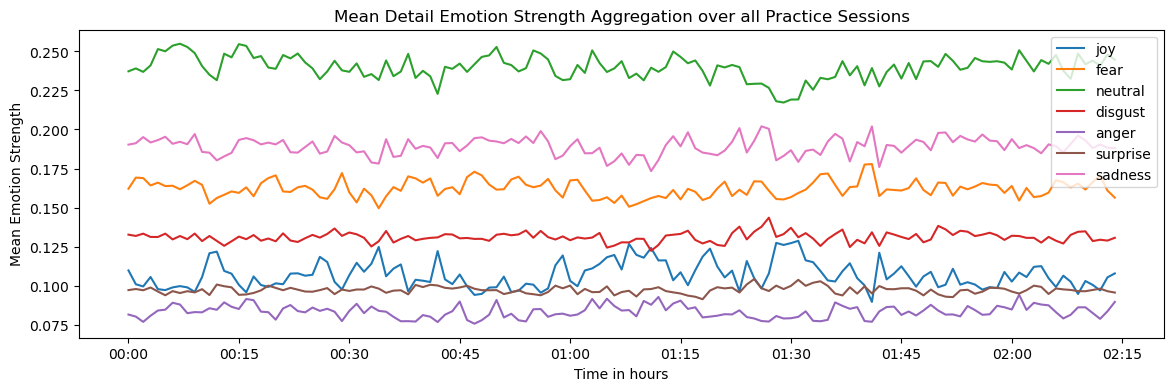

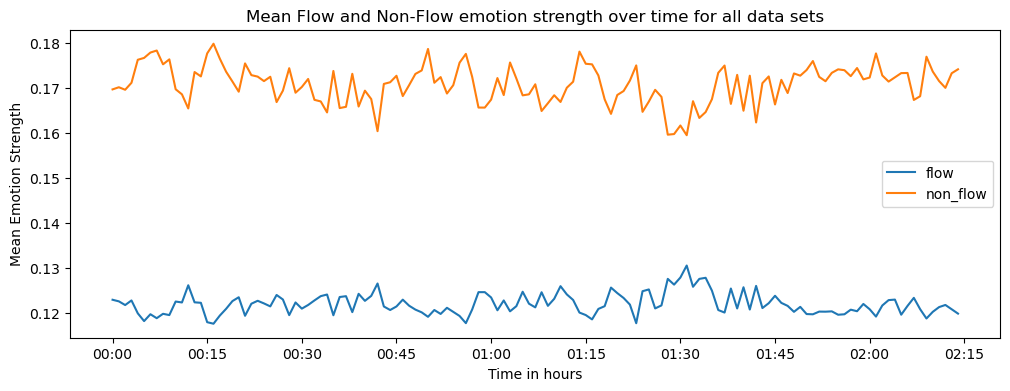

In [11]:
import statsmodels.api as sm

df_merged_cop =df_merged.copy()

flow_emotions = ['joy', 'fear', 'surprise']
non_flow_emotions = ['neutral', 'sadness', 'anger']

df_merged_cop['flow'] = df_merged_cop[flow_emotions].mean(axis=1)
df_merged_cop['non_flow'] = df_merged_cop[non_flow_emotions].mean(axis=1)

# Convert the 'start' column to datetime format
df_merged_cop['start'] = pd.to_datetime(df_merged_cop['start'], unit='s')

# Set the 'start' column as the index
df_merged_reset= df_merged_cop.set_index('start')

# Resample the dataframe to 30-second intervals and calculate the mean of each column
resampled_df = df_merged_reset.resample('60S').mean()


# Reset the index to obtain the 'start' column as a regular column
resampled_df.reset_index(inplace=True)

all_emotions_line_plot(resampled_df.iloc[:int(max(df_rhythm_morning['start']/60))+1,:], 'Mean Detail Emotion Strength Aggregation over all Practice Sessions')
flow_non_flow_emotions_line_plot(resampled_df.iloc[:int(max(df_rhythm_morning['start']/60))+1,:], 'Mean Flow and Non-Flow emotion strength over time for all data sets')

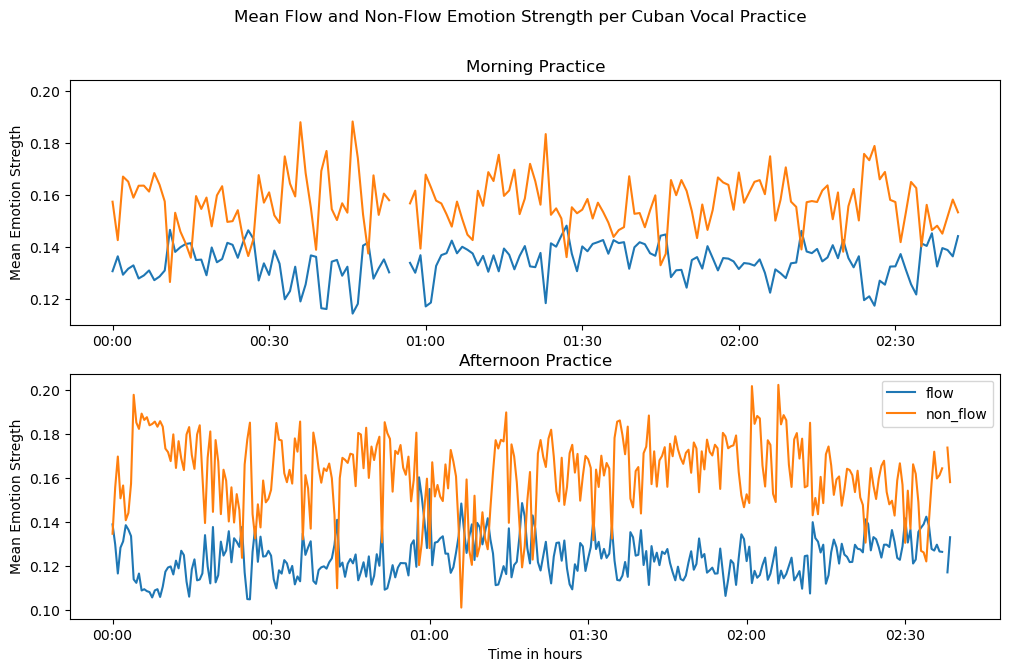

In [12]:
flow_non_flow_per_band_type(df_vocals_morning, df_vocals_afternoon, 'Mean Flow and Non-Flow Emotion Strength per Cuban Vocal Practice')

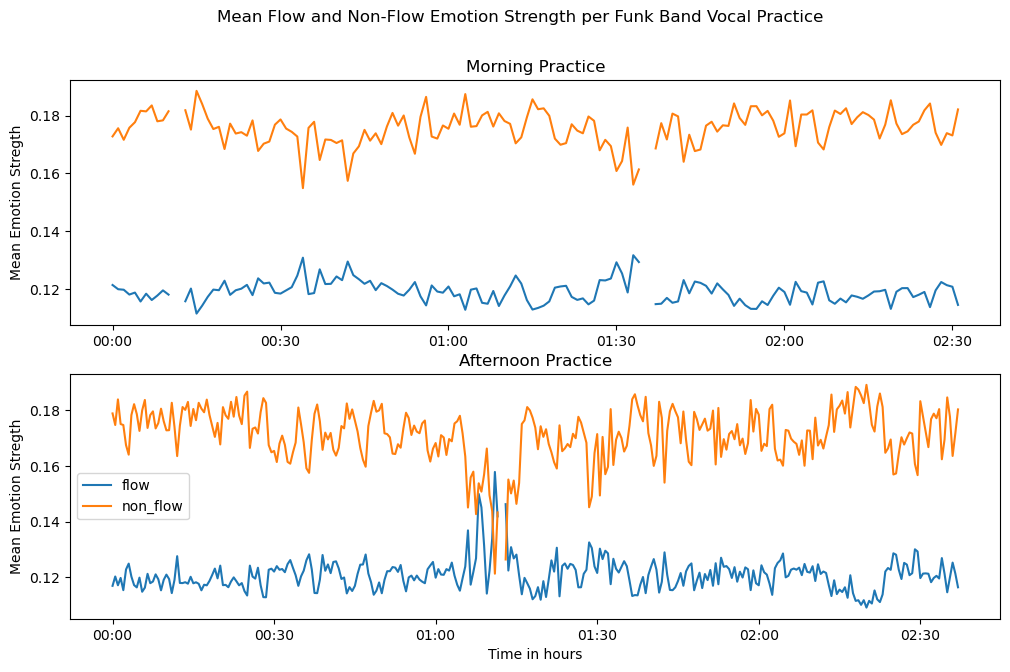

In [13]:
flow_non_flow_per_band_type(df_band_morning, df_band_afternoon, 'Mean Flow and Non-Flow Emotion Strength per Funk Band Vocal Practice')

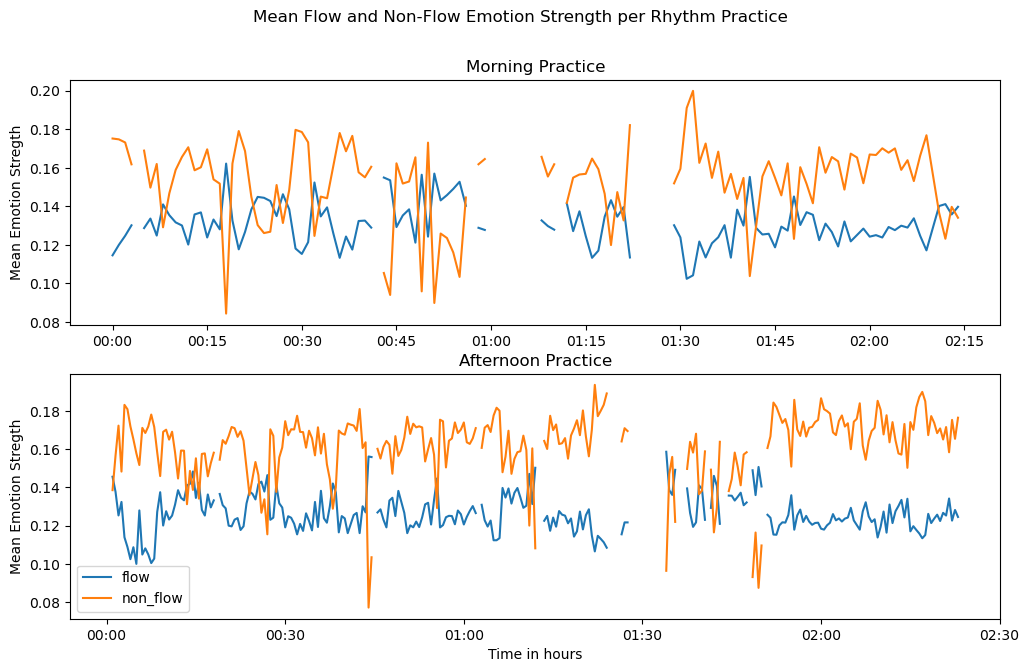

In [14]:
flow_non_flow_per_band_type(df_rhythm_morning, df_rhythm_afternoon, 'Mean Flow and Non-Flow Emotion Strength per Rhythm Practice')

In [15]:
PATCH_SIZE = 3
df_vocals_morning = pd.read_csv('../data/hume/processed/Cuban_vocals_morning.csv', index_col=0)
df_vocals_morning_patch = calc_patches(df_vocals_morning,PATCH_SIZE)

df_vocals_afternoon = pd.read_csv('../data/hume/processed/Cuban_vocals_afternoon.csv', index_col=0)
df_vocals_afternoon_patch = calc_patches(df_vocals_afternoon,PATCH_SIZE)

# df_vocals = pd.concat([df_vocals_morning, df_vocals_afternoon])

df_band_morning = pd.read_csv('../data/hume/processed/Funk_band_morning.csv', index_col=0)
df_band_morning_patch = calc_patches(df_band_morning,PATCH_SIZE)


df_band_afternoon = pd.read_csv('../data/hume/processed/Funk_band_afternoon.csv', index_col=0)
df_band_afternoon_patch = calc_patches(df_band_afternoon,PATCH_SIZE)


df_rhythm_morning = pd.read_csv('../data/hume/processed/Funk_rhythm_morning.csv', index_col=0)
df_rhythm_morning_patch = calc_patches(df_rhythm_morning,PATCH_SIZE)

df_rhythm_afternoon = pd.read_csv('../data/hume/processed/Funk_rhythm_afternoon.csv', index_col=0)
df_rhythm_afternoon_patch = calc_patches(df_rhythm_afternoon,PATCH_SIZE)


df_merged = pd.concat([pd.concat([df_vocals_morning, df_vocals_afternoon, df_band_morning,df_band_afternoon, df_rhythm_morning, df_rhythm_afternoon])])
# df_merged_patch = pd.concat([pd.concat([df_vocals_morning_patch, df_vocals_afternoon_patch, df_band_morning_patch,df_band_afternoon_patch, df_rhythm_morning_patch, df_rhythm_afternoon_patch])])
df_merged

,anger,disgust,fear,joy,sadness,surprise,neutral,start_patch,start
0,0.039957,0.114220,0.126544,0.169541,0.137182,0.147788,0.157061,0.0,0.10
1,0.037922,0.104910,0.110700,0.190294,0.127883,0.129474,0.150551,0.0,0.20
2,0.044073,0.118693,0.129124,0.167583,0.158697,0.130753,0.167633,0.0,0.30
3,0.041380,0.134487,0.140038,0.133327,0.198558,0.126955,0.179034,0.0,0.40
4,0.047777,0.118812,0.136461,0.141578,0.157510,0.128101,0.191475,0.0,0.50
...,...,...,...,...,...,...,...,...,...
63475,0.074321,0.149759,0.149410,0.091297,0.201079,0.097925,0.242697,140.0,8588.08
63476,0.067359,0.155635,0.145315,0.077353,0.226719,0.081795,0.271931,140.0,8588.20
63477,0.071918,0.149919,0.149765,0.091086,0.218187,0.088475,0.270641,140.0,8588.32
63478,0.063536,0.148344,0.139564,0.079959,0.225815,0.088789,0.313732,140.0,8588.40


In [16]:
import statsmodels.api as sm

df_merged_cop = df_merged.copy()
flow_emotions = ['joy', 'fear', 'surprise']
non_flow_emotions = ['neutral', 'sadness', 'anger']

df_merged_cop['flow'] = df_merged_cop[flow_emotions].mean(axis=1)
df_merged_cop['non_flow'] = df_merged_cop[non_flow_emotions].mean(axis=1)

# Convert the 'start' column to datetime format
df_merged_cop['start'] = pd.to_datetime(df_merged_cop['start'], unit='s')


# Resample the dataframe to 30-second intervals and calculate the mean of each column
resampled_df = df_merged_reset.resample('60S').mean()
resampled_df=resampled_df.reset_index()

# Create a constant column for the regression model
resampled_df['constant'] = 1
resampled_df['minutes'] = resampled_df.index

# Fit the linear regression model
model = sm.OLS(resampled_df.loc[:int(max(df_rhythm_morning['start']/60))+1,'flow'], sm.add_constant(resampled_df.loc[:int(max(df_rhythm_morning['start']/60))+1,'minutes']))
results = model.fit()
predicted_values = results.predict(sm.add_constant(resampled_df.loc[:int(max(df_rhythm_morning['start']/60))+1,'minutes']))


# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.07512
Date:                Fri, 21 Jul 2023   Prob (F-statistic):              0.784
Time:                        11:41:03   Log-Likelihood:                 628.18
No. Observations:                 136   AIC:                            -1252.
Df Residuals:                     134   BIC:                            -1247.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1219      0.000    297.318      0.0

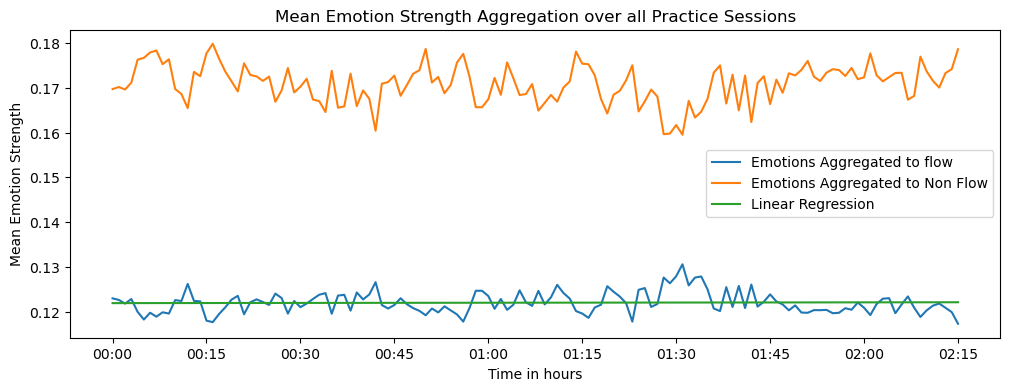

In [17]:
plt.figure(figsize=(12, 4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.plot(resampled_df.loc[:int(max(df_rhythm_morning['start']/60))+1,'start'], resampled_df.loc[:int(max(df_rhythm_morning['start']/60))+1,'flow'], label = "Emotions Aggregated to flow")
plt.plot(resampled_df.loc[:int(max(df_rhythm_morning['start']/60))+1,'start'], resampled_df.loc[:int(max(df_rhythm_morning['start']/60))+1,'non_flow'], label = "Emotions Aggregated to Non Flow")
plt.plot(resampled_df.loc[:int(max(df_rhythm_morning['start']/60))+1,'start'], predicted_values, label="Linear Regression")
plt.legend()
plt.title('Mean Emotion Strength Aggregation over all Practice Sessions')
plt.ylabel('Mean Emotion Strength')
plt.xlabel('Time in hours')
plt.show()

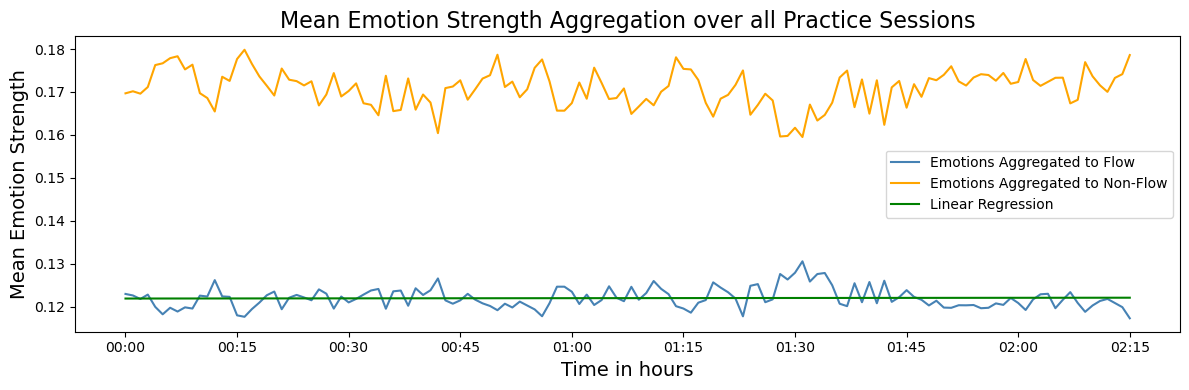

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Assuming resampled_df, df_rhythm_morning, and predicted_values are already defined

plt.figure(figsize=(12, 4))

# Format x-axis to display time in hours and minutes
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Plot the data using Seaborn lineplot
sns.lineplot(x=resampled_df.loc[:int(max(df_rhythm_morning['start']/60))+1, 'start'], y=resampled_df.loc[:int(max(df_rhythm_morning['start']/60))+1, 'flow'], label="Emotions Aggregated to Flow", color='steelblue')
sns.lineplot(x=resampled_df.loc[:int(max(df_rhythm_morning['start']/60))+1, 'start'], y=resampled_df.loc[:int(max(df_rhythm_morning['start']/60))+1, 'non_flow'], label="Emotions Aggregated to Non-Flow", color='orange')
sns.lineplot(x=resampled_df.loc[:int(max(df_rhythm_morning['start']/60))+1, 'start'], y=predicted_values, label="Linear Regression", color='green')

# Set the legend, title, and axis labels
plt.legend()
plt.title('Mean Emotion Strength Aggregation over all Practice Sessions', fontsize=16)
plt.ylabel('Mean Emotion Strength', fontsize=14)
plt.xlabel('Time in hours', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()